In [3]:
# 프로젝트 루트를 찾아 이동 → 언제 어디서 실행해도 data/ 경로가 보장됩니다
from pathlib import Path
import os, sys

p = Path.cwd()
while p != p.parent and not (p / "data" / "raw").exists():
    p = p.parent
os.chdir(p)                                   # 루트로 이동
print("✔️ 작업 디렉터리:", Path.cwd())

# 한글 폰트 설정 (mac, win, linux)
import matplotlib as mpl, matplotlib.font_manager as fm
if sys.platform.startswith("darwin"):
    fp = "/Library/Fonts/AppleGothic.ttf"
elif sys.platform.startswith("win"):
    fp = "C:/Windows/Fonts/malgun.ttf"
else:
    fp = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
if Path(fp).exists():
    mpl.rc("font", family=fm.FontProperties(fname=fp).get_name())
mpl.rc("axes", unicode_minus=False)    # 마이너스 깨짐 방지


✔️ 작업 디렉터리: /


셀 1. 라이브러리 가져오기 & 데이터 로드

In [4]:
import pandas as pd, numpy as np

# 병합+플래그 파일이 있으면 그대로, 없으면 기본집계 CSV 로드 후 플래그 생성
try:
    df = pd.read_csv("data/processed/merged_annual_2024_with_flags.csv", encoding="utf-8-sig")
    print("▲ with_flags 파일 사용")
except FileNotFoundError:
    df = pd.read_csv("data/processed/merged_annual_2024.csv", encoding="utf-8-sig")
    metrics = ["resident_pop_2024","floating_pop_2024","estimated_sales_2024"]
    q75 = {m: df[m].quantile(0.75) for m in metrics}
    q90 = {m: df[m].quantile(0.90) for m in metrics}
    med = {m: df[m].median()          for m in metrics}
    for m in metrics:
        df[f"{m}_high25"] = df[m] >= q75[m]
        df[f"{m}_high10"] = df[m] >= q90[m]
        df[f"{m}_high50"] = df[m] >= med[m]
    df["is_active_25"] = df[[f"{m}_high25" for m in metrics]].sum(axis=1) >= 2
    df["is_active_10"] = df[[f"{m}_high10" for m in metrics]].sum(axis=1) >= 2
    df["is_active_50"] = df[[f"{m}_high50" for m in metrics]].all(axis=1)
    print("▲ 플래그 즉석 계산")

print("총 상권:", len(df),
      "| 75% 기준 활발:", df["is_active_25"].sum(),
      "| 90% 기준:", df["is_active_10"].sum(),
      "| Median 기준:", df["is_active_50"].sum())


FileNotFoundError: [Errno 2] No such file or directory: 'data/processed/merged_annual_2024.csv'

셀 2. 퍼센타일 기준별 “활발 상권 수” 막대차트

/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_6996/2321710491.py:13: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_6996/2321710491.py:13: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_6996/2321710491.py:13: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_6996/2321710491.py:13: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_6996/2321710491.py:13: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_699

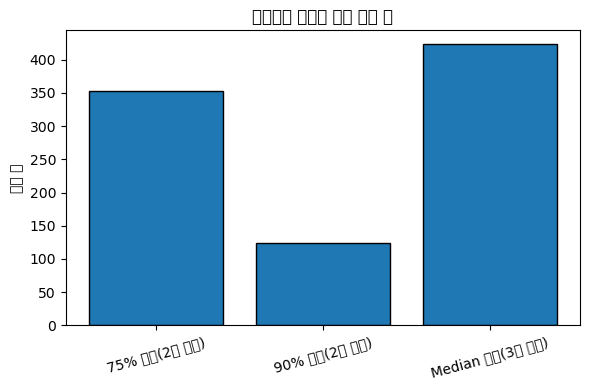

In [ ]:
# 각 기준별 개수 계산
counts = {
    "75% 기준(2개 이상)": df["is_active_25"].sum(),
    "90% 기준(2개 이상)": df["is_active_10"].sum(),
    "Median 기준(3개 모두)": df["is_active_50"].sum(),
}

plt.figure(figsize=(6,4))
plt.bar(counts.keys(), counts.values(), edgecolor="k")
plt.title("퍼센타일 기준별 활발 상권 수")
plt.ylabel("상권 수")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


셀 3. 지표별 분포 — “활발(is_active_25)” 상권 강조 히스토그램

/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_6996/1855778340.py:12: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_6996/1855778340.py:12: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_6996/1855778340.py:12: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_6996/1855778340.py:12: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_6996/1855778340.py:12: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_

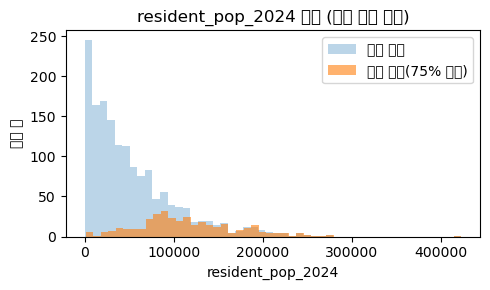

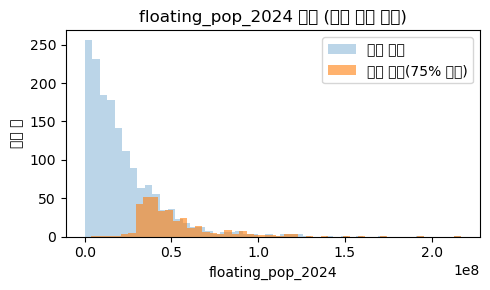

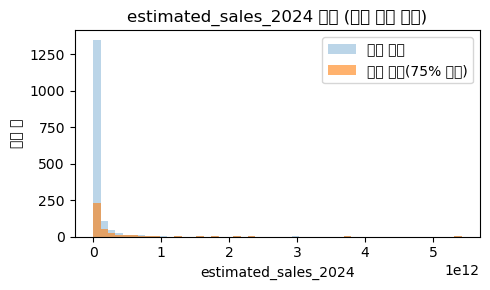

In [ ]:
for m in metrics:
    plt.figure(figsize=(5,3))
    # 전체 분포
    plt.hist(df[m], bins=50, alpha=0.3, label="전체 상권")
    # is_active_25 분포
    plt.hist(df.loc[df["is_active_25"], m],
             bins=50, alpha=0.6, label="활발 상권(75% 기준)")
    plt.title(f"{m} 분포 (활발 상권 강조)")
    plt.xlabel(m)
    plt.ylabel("상권 수")
    plt.legend()
    plt.tight_layout()
    plt.show()


셀 4. 산점도 — 거주인구 vs 유동인구, “활발” 표시

/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_6996/2347310627.py:14: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_6996/2347310627.py:14: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_6996/2347310627.py:14: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_6996/2347310627.py:14: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_6996/2347310627.py:14: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/n2/zv57chv558n8skgcplvrzwhc0000gn/T/ipykernel_6996/

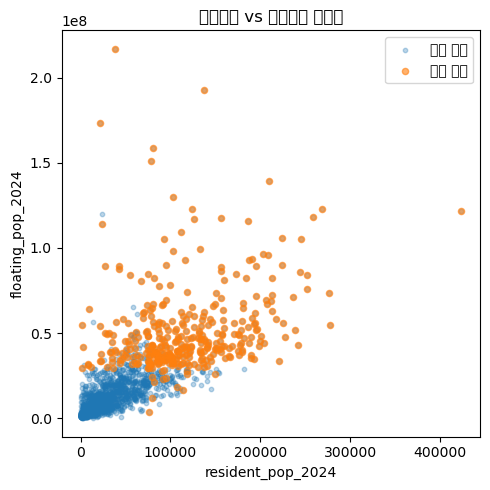

In [ ]:
plt.figure(figsize=(5,5))
# 전체 상권
plt.scatter(df["resident_pop_2024"],
            df["floating_pop_2024"],
            s=10, alpha=0.3, label="전체 상권")
# 활발 상권
plt.scatter(df.loc[df["is_active_25"], "resident_pop_2024"],
            df.loc[df["is_active_25"], "floating_pop_2024"],
            s=20, alpha=0.6, label="활발 상권")
plt.xlabel("resident_pop_2024")
plt.ylabel("floating_pop_2024")
plt.title("거주인구 vs 유동인구 산점도")
plt.legend()
plt.tight_layout()
plt.show()
